In [6]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#sample_sub = pd.read_csv('/content/drive/MyDrive/Kannada-MNIST/sample_submission.csv')
dig = pd.read_csv('Dig-MNIST.csv')

In [8]:
X_train=train.drop('label',axis=1)

Y_train=train.label

test=test.drop('id',axis=1)

In [10]:
test_x = np.load('Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test/arr_0.npy')
test_y = np.load('Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test/arr_0.npy')

In [11]:
test_x = test_x/255

In [14]:
from tensorflow.keras.models import load_model

resnet_100ep = load_model('models/100ep_resnet.h5')
CNN_100ep = load_model('models/CNN_100ep.h5')
CNN_50ep = load_model('models/CNN_50ep.h5')
CNN_7x7 = load_model('models/CNN_7x7_filter.h5')
CNN_norm= load_model('models/CNN_norm.h5')
resnet = load_model('models/residual_100epochs.h5')
CNN_moreFilters = load_model('models/CNN_MoreFilters.h5')

In [18]:
models = [resnet_100ep, CNN_100ep, CNN_50ep, CNN_7x7, CNN_norm, resnet, CNN_moreFilters]

In [85]:
model_names = ["resnet_100ep", "CNN_100ep", "CNN_50ep", "CNN_7x7", "CNN_norm", "resnet", "CNN_moreFilters"]

In [23]:
test_pred = []
test_preds = []

for i in range(len(models)):
    test_pred.append(models[i].predict(test_x))
    test_preds.append(np.argmax(test_pred[i], axis = 1))


313/313 [==============================] - 1s 3ms/step


In [24]:
from sklearn.metrics import accuracy_score

test_accuracies = []

for i in range(len(models)):
    test_accuracies.append(accuracy_score(test_y, test_preds[i]) * 100)

In [25]:
test_accuracies

[97.89, 98.56, 98.17, 97.49, 97.44, 97.8, 98.29]

In [46]:
test_confs = []

for i in range(len(models)):
    test_confs.append(pd.DataFrame(confusion_matrix(test_y, test_preds[i]), index = range(0, 10), columns = range(0, 10)))

In [47]:
test_confs[0]

,0,1,2,3,4,5,6,7,8,9
0,954,46,0,0,0,0,0,0,0,0
1,2,997,0,0,0,0,0,0,0,1
2,3,0,997,0,0,0,0,0,0,0
3,2,16,0,967,4,3,0,7,0,1
4,0,1,0,2,995,0,1,0,0,1
5,0,0,0,3,33,964,0,0,0,0
6,0,1,0,0,0,0,951,3,0,45
7,4,5,4,6,2,0,6,967,1,5
8,0,0,0,0,1,1,0,0,998,0
9,1,0,0,0,0,0,0,0,0,999


In [32]:
CNN_norm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1

In [54]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming xx is your numpy array with 10000 samples of images of shape (10000, 28, 28)
# # and y_xx contains the predicted values for each image, and yy contains the actual values

# indices_to_plot = []  # Store indices where yy is 1 and y_xx is 0
# for i in range(len(test_y)):
#     if test_y[i] == 0 and preds[i] == 1:
#         indices_to_plot.append(i)


# # Fetch images with labels and predictions
# selected_images = test_x[np.array(indices_to_plot)]  # Use np.array to correctly index the images
# actual_labels = test_y[np.array(indices_to_plot)]
# predicted_labels = preds[np.array(indices_to_plot)]

# # Plotting the selected images
# num_images = len(selected_images)
# num_rows = 5
# num_cols = int(np.ceil(num_images / num_rows))
# plt.figure(figsize=(12, 10))

# for i in range(num_images):
#     plt.subplot(num_rows, num_cols, i + 1)
#     plt.imshow(selected_images[i], cmap='gray')
#     plt.title(f"Actual: {actual_labels[i]}, Predicted: {predicted_labels[i]}", fontsize=4)
#     plt.axis('off')

# plt.tight_layout()
# plt.show()


In [55]:
  # plt.figure(figsize=(15, 15))

  # for i in range(120):
  #     plt.subplot(15, 8, i + 1)
  #     plt.imshow(test_x[i], cmap='gray')
  #     plt.title(f"Actual: {test_y[i]}", fontsize=4)
  #     plt.axis('off')

  # plt.tight_layout()
  # #plt.show()

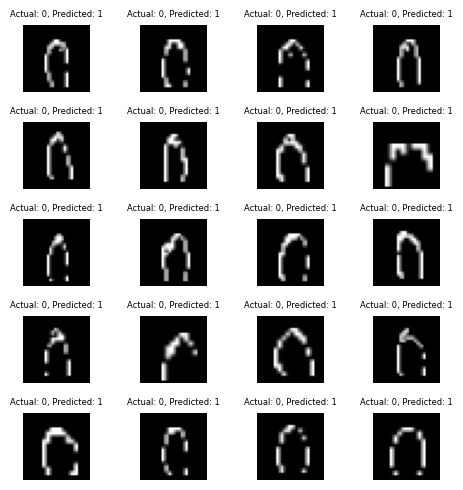

In [ ]:
# my model predicted the below images as 1, but they are labelled as "0"
# i wanted to verify if they are actually okay to be labelled as "0", and guess what? they look like 1 to me lol. atleast most of them

plt.figure(figsize=(5, 5))

j = 0;
for i in indices_to_plot[:20]:
  plt.subplot(5, 4, j+1)
  plt.imshow(test_x[i], cmap='gray')
  plt.title(f"Actual: {test_y[i]}, Predicted: {preds[i]}", fontsize=6)
  plt.axis('off')
  j = j + 1;

plt.tight_layout()
plt.show()

In [72]:
# one_in_test = []
# for i in range(len(test_y)):
#   if test_y[i] == 1:
#     one_in_test.append(i)


# j = 0

# plt.figure(figsize = (10, 10))
# for i in range(40):
#     plt.subplot(8, 5, j+1)
#     plt.imshow(test_x[one_in_test[i]], cmap='gray')
#     plt.axis('off')
#     j = j + 1;

# plt.tight_layout()
# plt.show()


In [33]:
test =[[], [], [], [], [], [], [], [], [], []]

for i in range(len(test_y)):
   test[test_y[i]].append(i)




In [71]:
# j = 0

# plt.figure(figsize = (25, 25))

# for i in range(200):
#     plt.subplot(20, 10, j+1)
#     plt.imshow(test_x[test[3][i]], cmap='gray')
#     plt.title(i, fontsize=10)
#     plt.axis('off')
#     j = j + 1;

# plt.tight_layout()
# plt.show()

In [ ]:
ind = []

for i in range(1000):
  if preds[test[3][i]] != 3 and preds[test[3][i]] == 1:
    ind.append(i)


In [78]:
# ind

# #plt.imshow(test_x[1693], cmap = 'gray')

# #print(test_y[1693], preds[1693])

In [77]:
# # my model predicted the below images as 1, but they are labelled as "3"

# # i wanted to verify if they are actually okay to be labelled as "3", and some are a bit too divergent. consider the 1st and 6th
# # images. do they deserve to be labelled as '3'?

# j = 0

# plt.figure(figsize = (12, 10))

# for i in range(len(ind)):
#     plt.subplot(7, 5, j+1)
#     plt.imshow(test_x[test[3][ind[i]]], cmap='gray')
#     plt.title(test[3][ind[i]], fontsize=10)
#     plt.axis('off')
#     j = j + 1;

# plt.tight_layout()
# plt.show()

In [ ]:
# and it looks like our model survives this "3" and "1" mishape if we consider top 5 accuracy. 3 always lands in someplace there

In [76]:
# np.set_printoptions(formatter={'float': '{:0.8f}'.format})

# for i in range(16):
#   print("\t\t\t\tImage ", i + 1, '\n', pred[test[3][ind[i]]], '\n\n')

In [75]:
# # we have similar results if we see our confusion matrix for test data for the "actually = 6" but we predicted as "9"

# # and no surprise, we humans can also fail at this, so i dont think the model is to be blamed.
# # although i do agree that we can train it deliberately on such images lol

# ind = []

# for i in range(1000):
#   if preds[test[6][i]] != 6 and preds[test[6][i]] == 9:
#     ind.append(i)

# j = 0


# plt.figure(figsize = (12, 10))

# for i in range(len(ind)):
#     plt.subplot(9, 5, j+1)
#     plt.imshow(test_x[test[6][ind[i]]], cmap='gray')
#     plt.title(test[6][i], fontsize=10)
#     plt.axis('off')
#     j = j + 1;

# plt.tight_layout()
# plt.show()

In [ ]:
preds[286], test_y[286]

(6, 6)

In [34]:
# testing on Dig_MNIST
dig_y = dig['label']
dig_x = dig.drop('label', axis = 1)

In [35]:
dig_x = dig_x / 255
dig_x = dig_x.values.reshape(-1, 28, 28)

In [91]:
dig_pred = []
dig_preds = []

for i in range(len(models)):
  dig_pred.append(models[i].predict(dig_x))
  dig_preds.append(np.argmax(dig_pred[i], axis = 1))


320/320 [==============================] - 1s 3ms/step


In [97]:
dig_accuracies = []

for i in range(len(models)):
  dig_accuracies.append(accuracy_score(dig_y, dig_preds[i]) * 100)


In [98]:
for i in range(len(models)):
  print(f"test: {test_accuracies[i]} \t dig: {dig_accuracies[i]}")

test: 97.89 	 dig: 89.43359375
test: 98.56 	 dig: 89.31640625
test: 98.17 	 dig: 88.310546875
test: 97.49 	 dig: 85.83984375
test: 97.44 	 dig: 77.880859375
test: 97.8 	 dig: 87.216796875
test: 98.29 	 dig: 88.623046875


In [99]:
dig_confs = []

for i in range(len(models)):
  dig_confs.append(confusion_matrix(dig_y, dig_preds[i]))
  dig_confs[i] = pd.DataFrame(dig_confs[i], index = range(0, 10), columns = range(0, 10))

In [100]:
len(dig_confs)

7

In [48]:
test_confs[0]

,0,1,2,3,4,5,6,7,8,9
0,954,46,0,0,0,0,0,0,0,0
1,2,997,0,0,0,0,0,0,0,1
2,3,0,997,0,0,0,0,0,0,0
3,2,16,0,967,4,3,0,7,0,1
4,0,1,0,2,995,0,1,0,0,1
5,0,0,0,3,33,964,0,0,0,0
6,0,1,0,0,0,0,951,3,0,45
7,4,5,4,6,2,0,6,967,1,5
8,0,0,0,0,1,1,0,0,998,0
9,1,0,0,0,0,0,0,0,0,999


In [56]:
get = []

for i in range(len(dig_y)):
  if dig_y[i] == 0 and dig_preds[0][i] == 9:
    get.append(i)

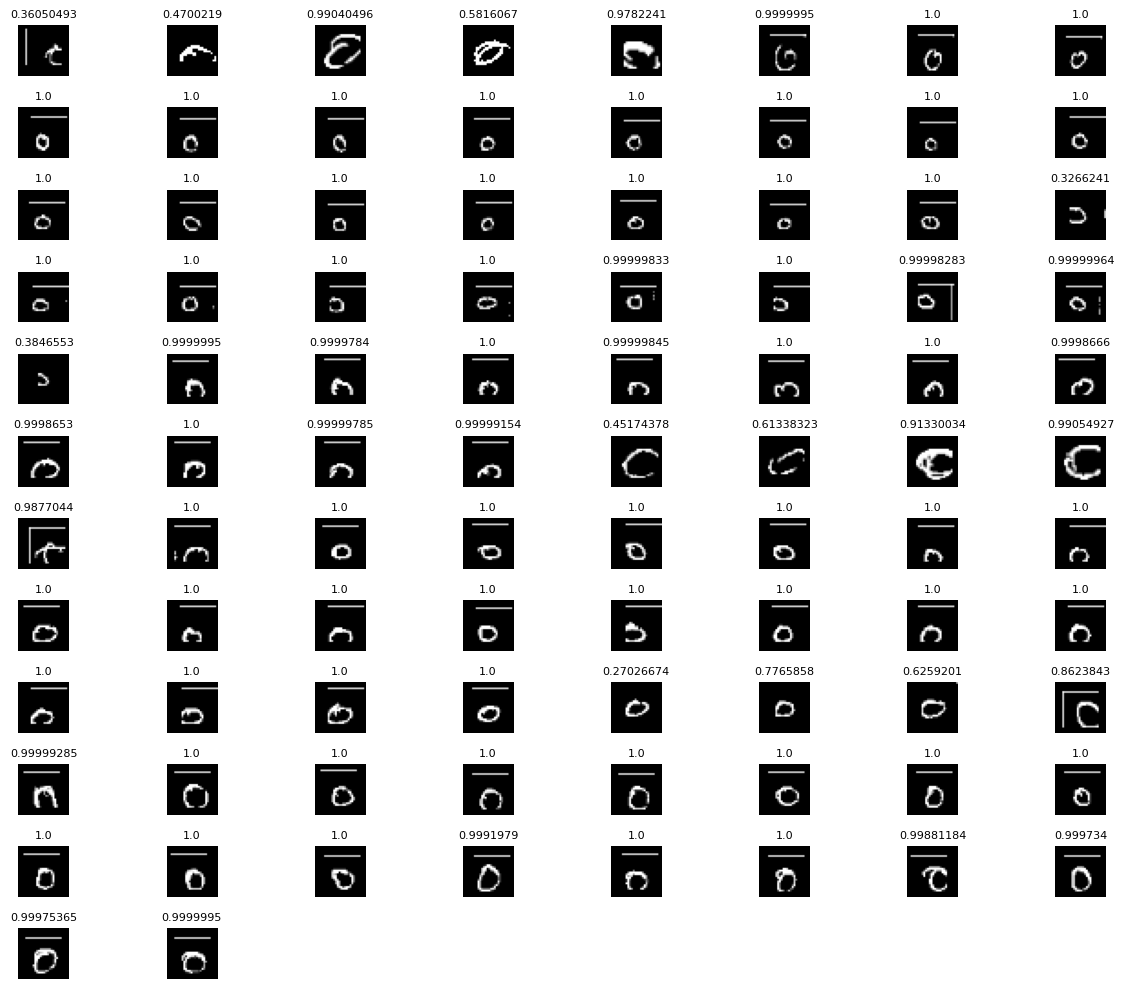

In [60]:
np.set_printoptions(formatter={'float': '{:0.8f}'.format})
plt.figure(figsize=(12, 10))

for i in range(len(get)):
    plt.subplot(12, 8, i + 1)
    plt.imshow(dig_x[get[i]], cmap='gray')
    plt.title(dig_pred[0][get[i]][9], fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

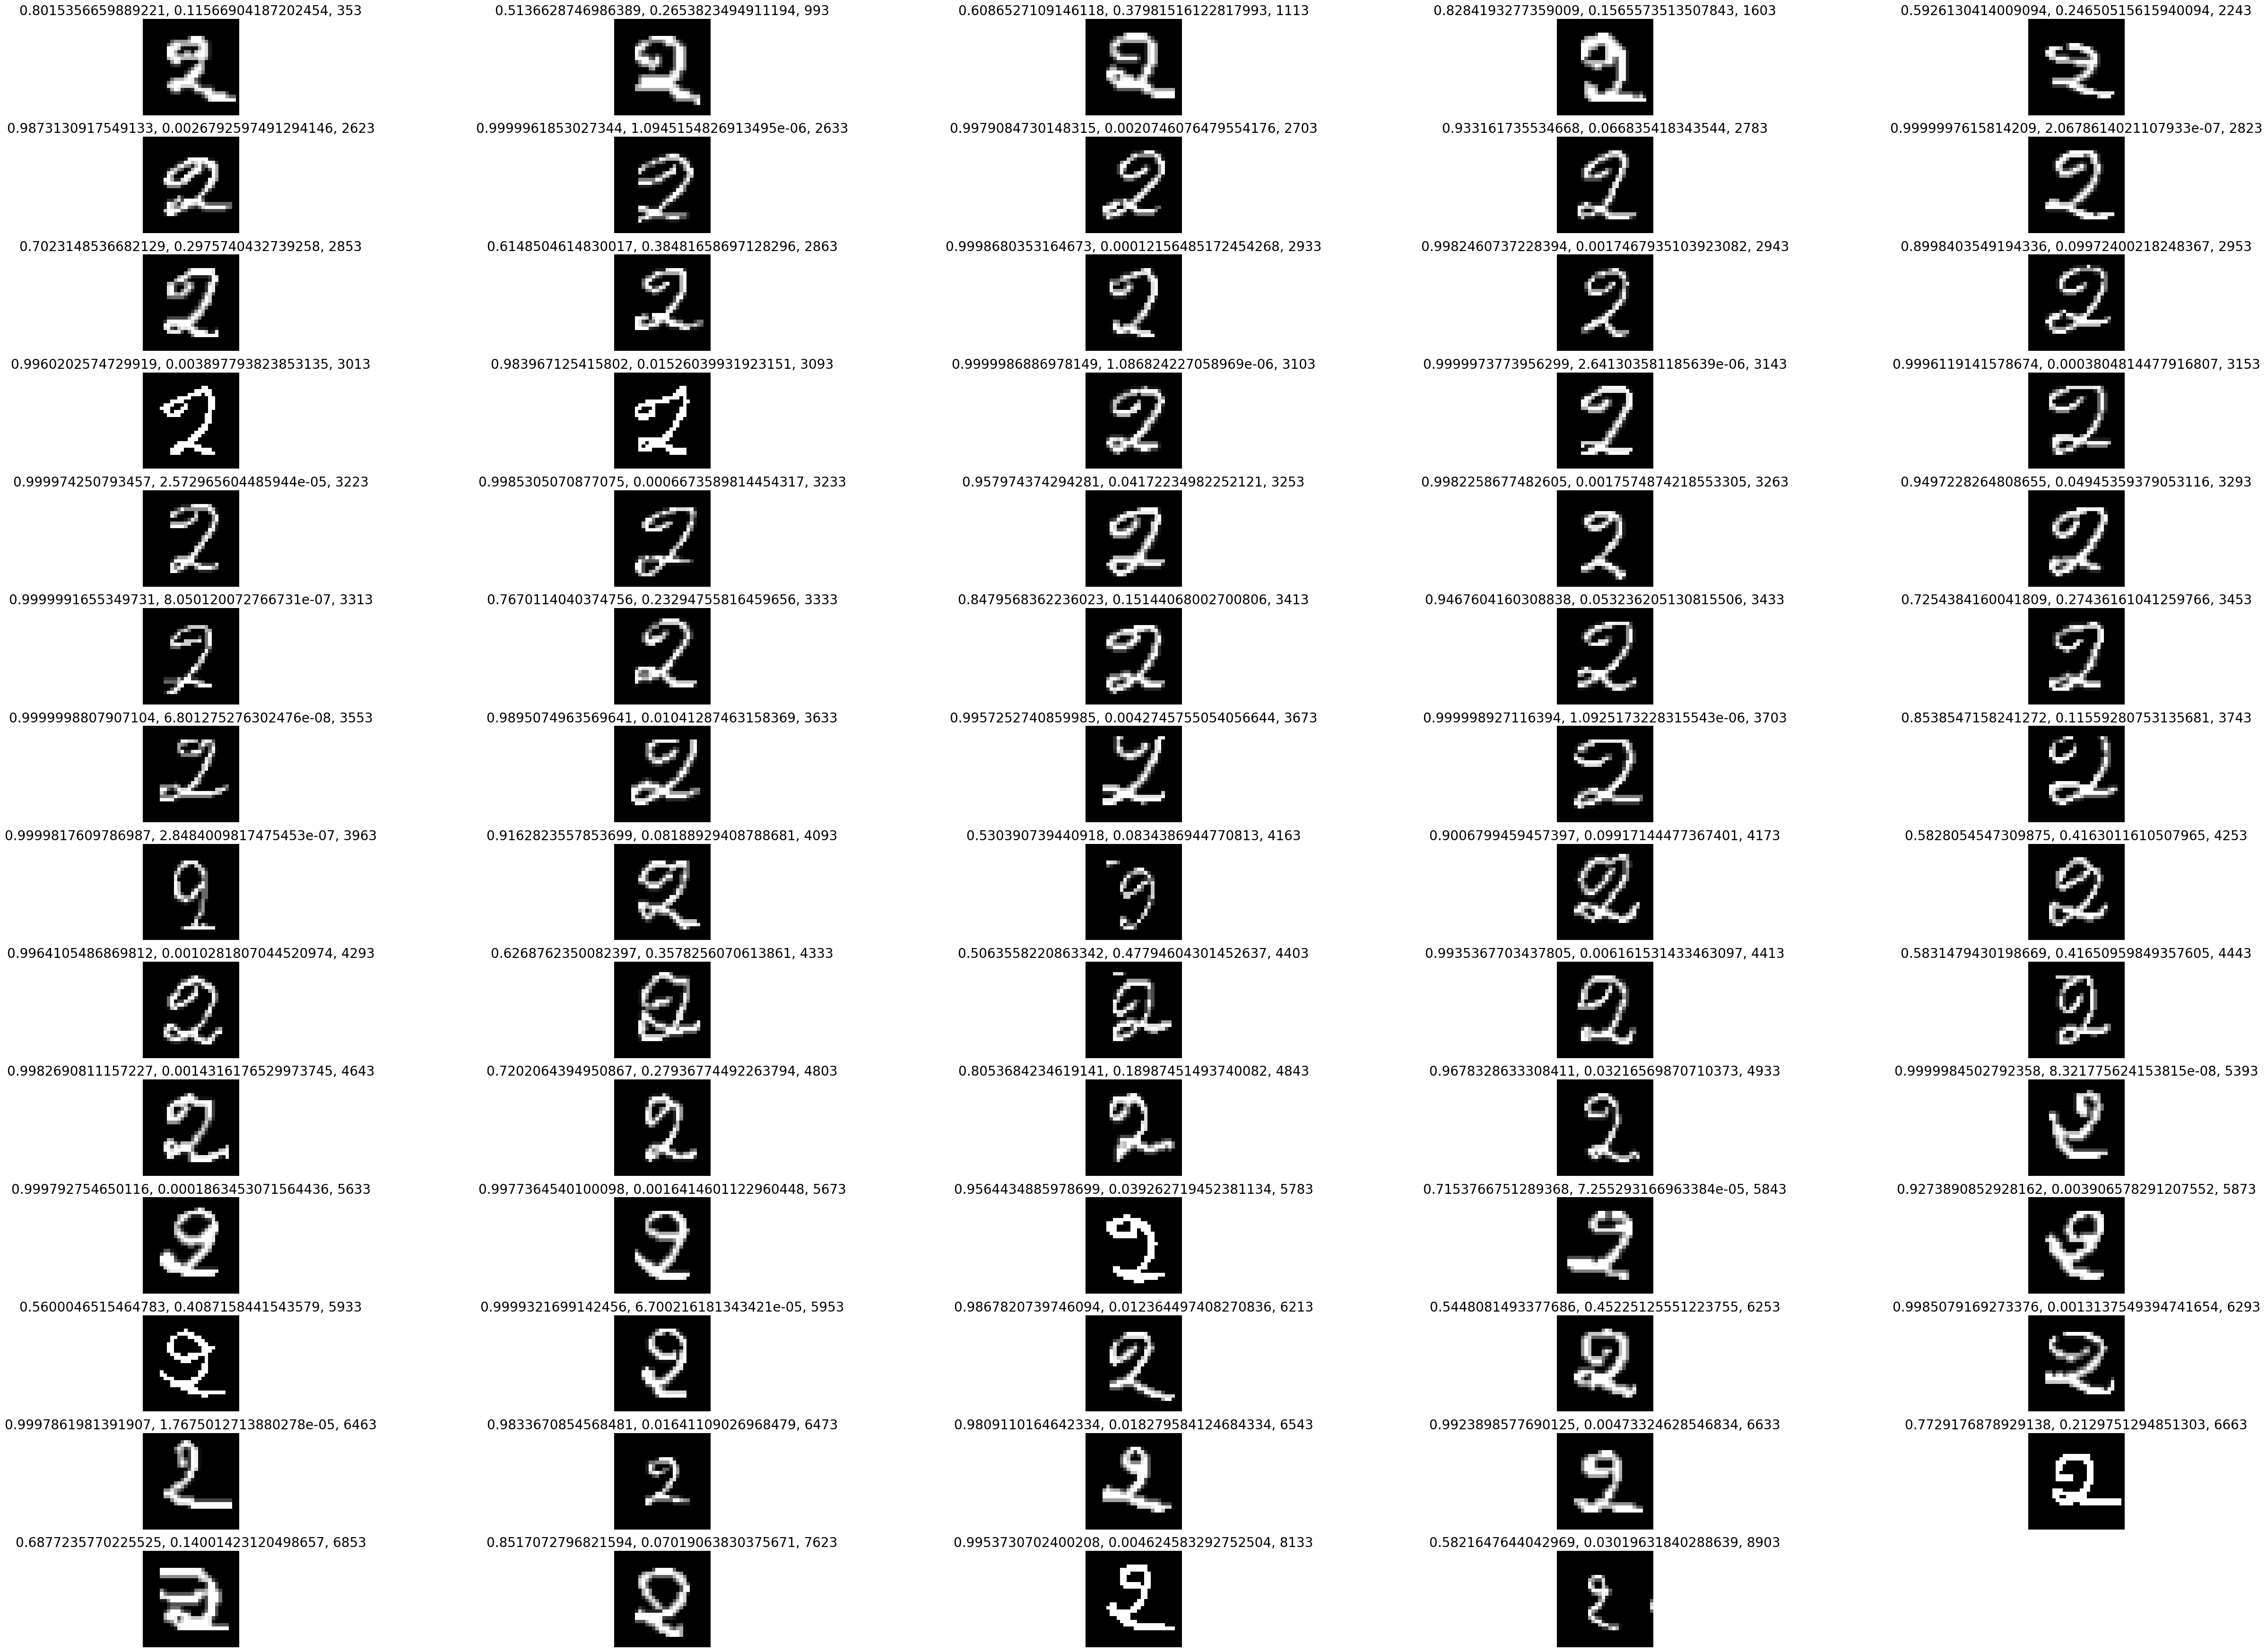

In [102]:
get_ = []

for i in range(len(dig_y)):
  if dig_y[i] == 3 and dig_preds[0][i] == 7:
    get_.append(i)

plt.figure(figsize=(50, 50))

for i in range(len(get_)):
    plt.subplot(20, 5, i + 1)
    plt.imshow(dig_x[get_[i]], cmap='gray')
    plt.title(f"{dig_pred[0][get_[i]][7]}, {dig_pred[0][get_[i]][3]}, {get_[i]}", fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [106]:
dig_confs[0]

,0,1,2,3,4,5,6,7,8,9
0,818,52,28,5,0,7,1,5,18,90
1,29,962,9,2,0,3,1,12,1,5
2,9,12,967,6,0,8,6,5,8,3
3,3,5,35,878,0,29,5,69,0,0
4,1,7,11,2,958,8,10,7,7,13
5,0,2,4,3,15,991,1,1,7,0
6,4,12,15,7,7,3,856,52,19,49
7,4,8,15,2,0,6,125,853,5,6
8,6,4,10,2,0,7,29,4,949,13
9,3,11,1,0,2,0,59,0,22,926


In [109]:
j = []

for i in range(len(dig_y)):
    if dig_y[i] == 1 and dig_preds[1][i] == 7:
        j.append(i)

In [140]:
np.set_printoptions(formatter={'float': '{:0.14f}'.format})

for i in range(len(models)):
    print(model_names[i], '\t', dig_pred[i][2181][1])

resnet_100ep 	 0.9237212
CNN_100ep 	 0.09118517
CNN_50ep 	 0.1287054
CNN_7x7 	 0.03331096
CNN_norm 	 0.027232278
resnet 	 0.70161223
CNN_moreFilters 	 0.00032429353


In [146]:
models[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0

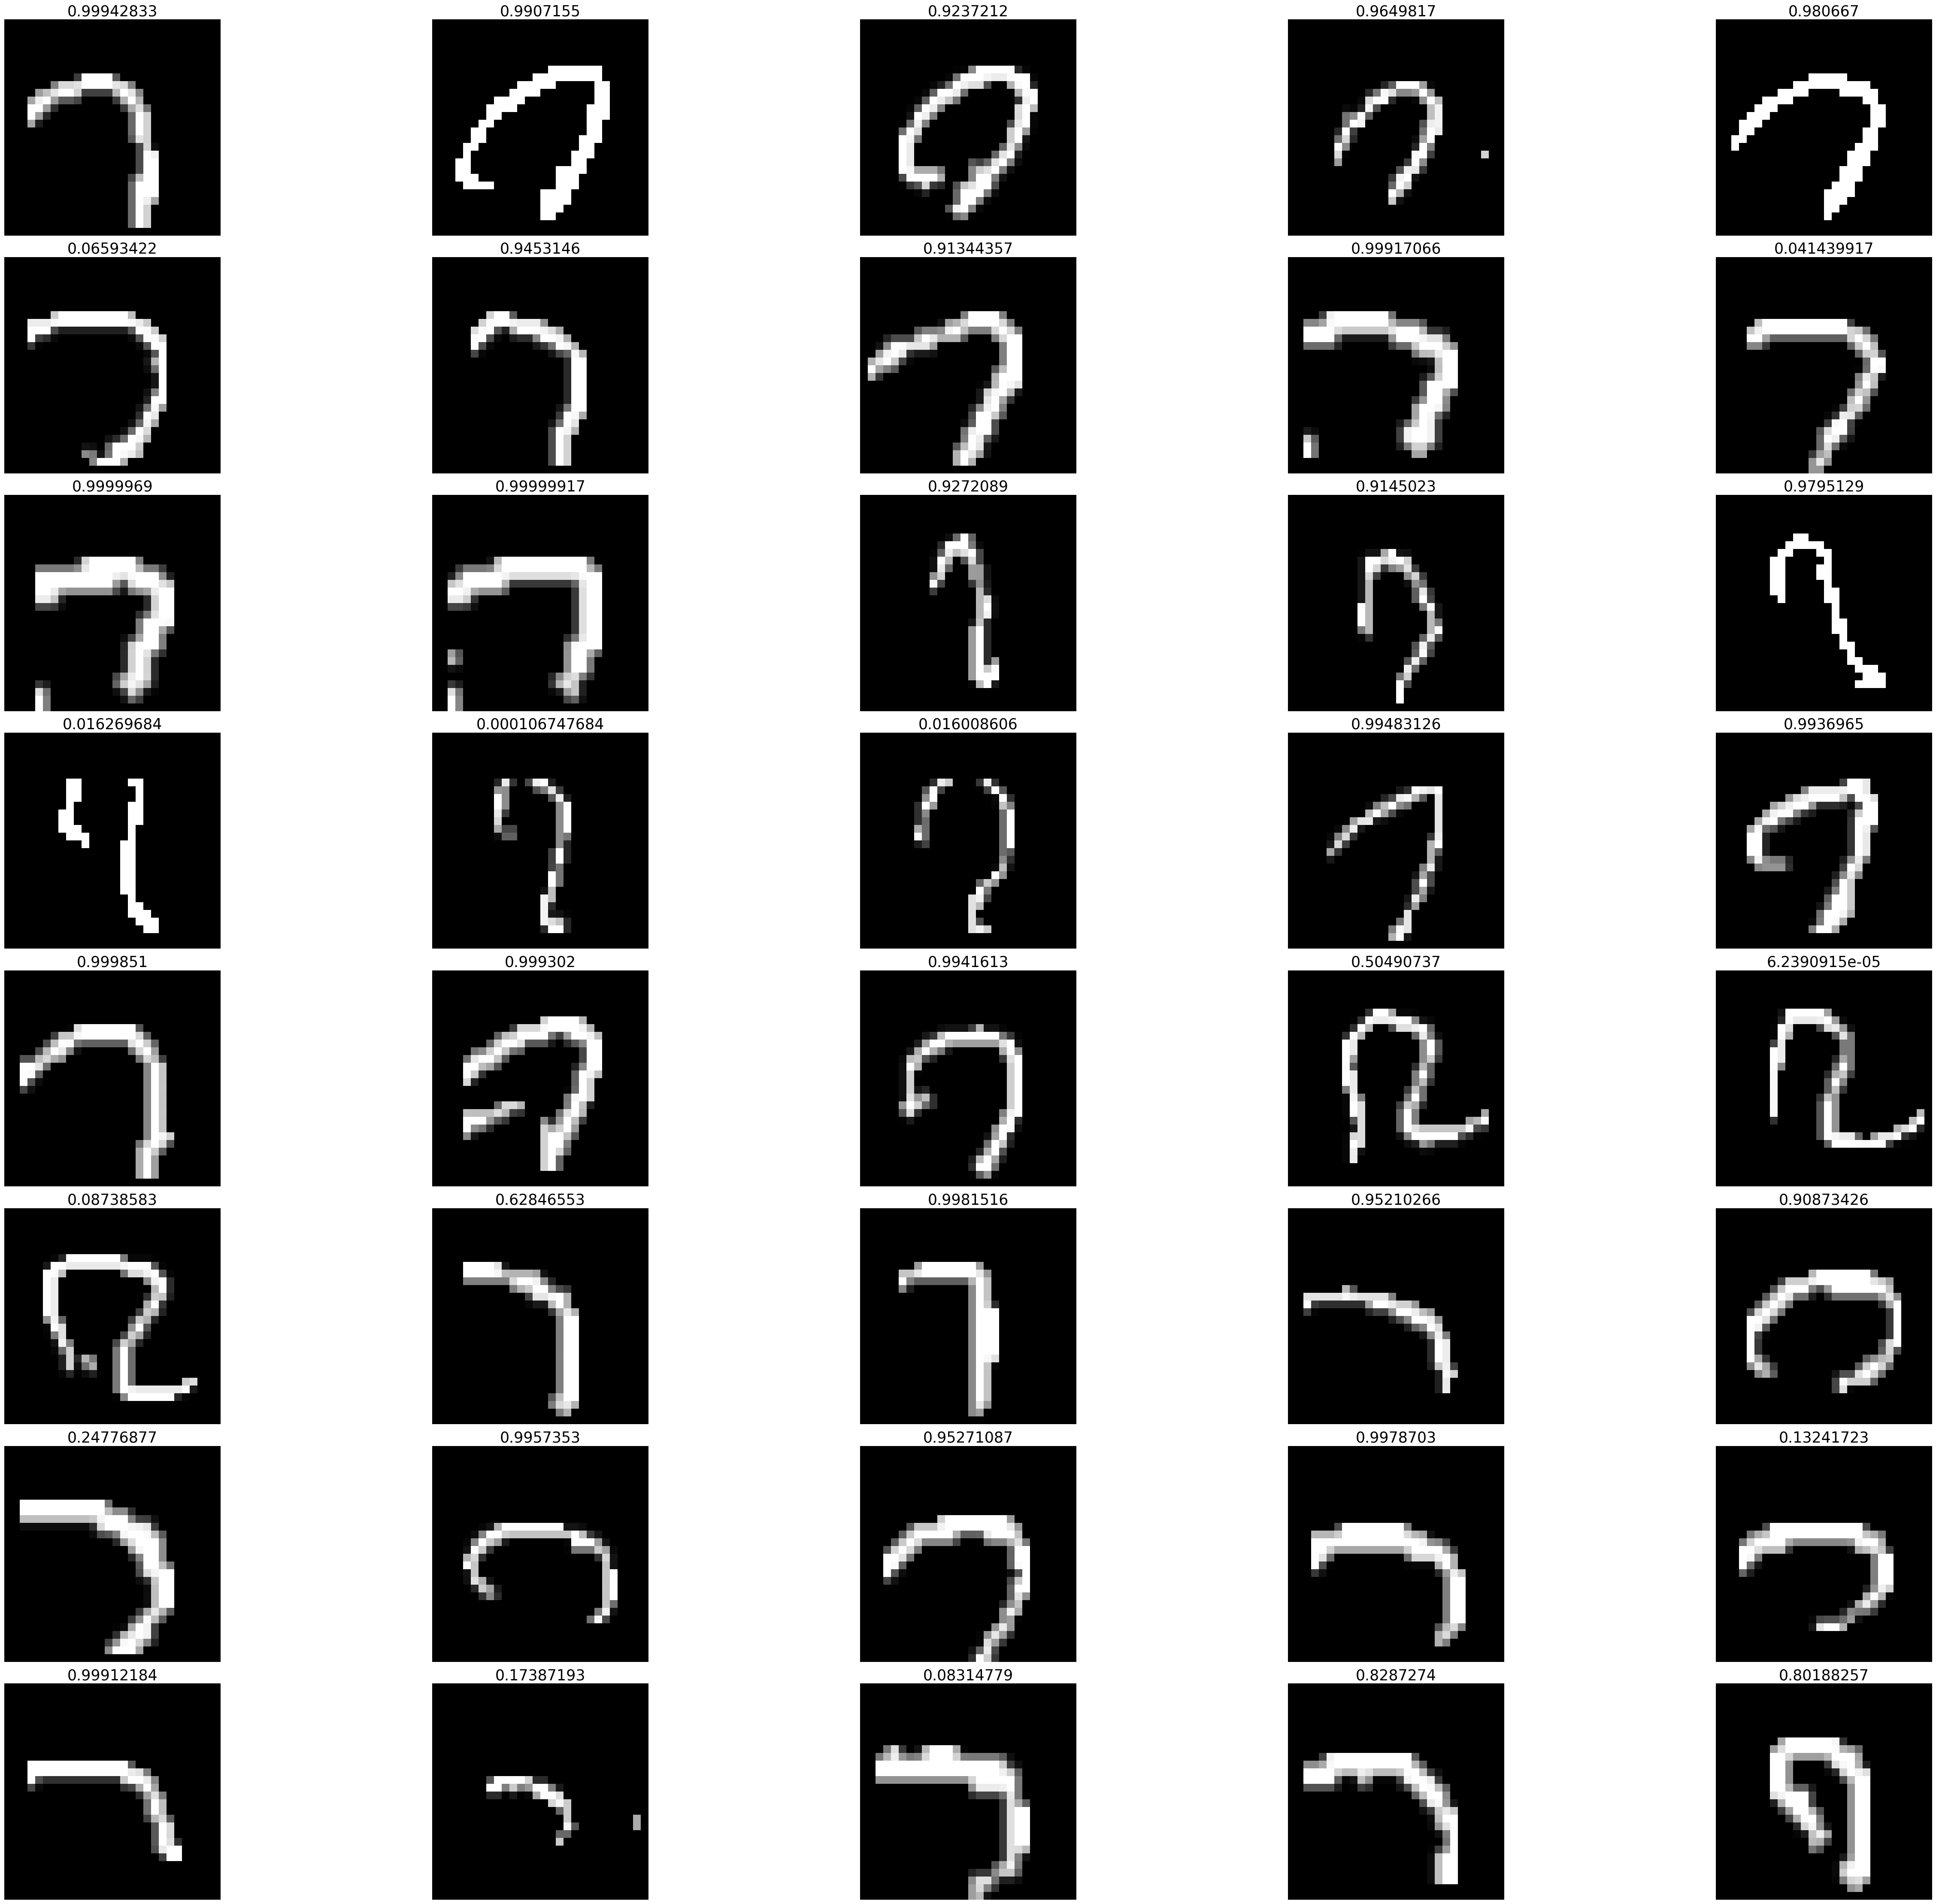

In [144]:
plt.figure(figsize=(50, 50))

for i in range(len(j)):
    plt.subplot(9, 5, i + 1)
    plt.imshow(dig_x[j[i]], cmap='gray')
    plt.title(dig_pred[0][j[i]][1], fontsize=25)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [104]:
# checking which of my model was best on predicting the id below as "3" because it definitely is a three
id = 4253

for i in range(len(models)):
    print(model_names[i], ":\t", dig_pred[i][id][3])

resnet_100ep :	 0.41630116
CNN_100ep :	 0.99919456
CNN_50ep :	 0.99019086
CNN_7x7 :	 0.98297244
CNN_norm :	 0.9077916
resnet :	 0.99869543
CNN_moreFilters :	 0.7076508


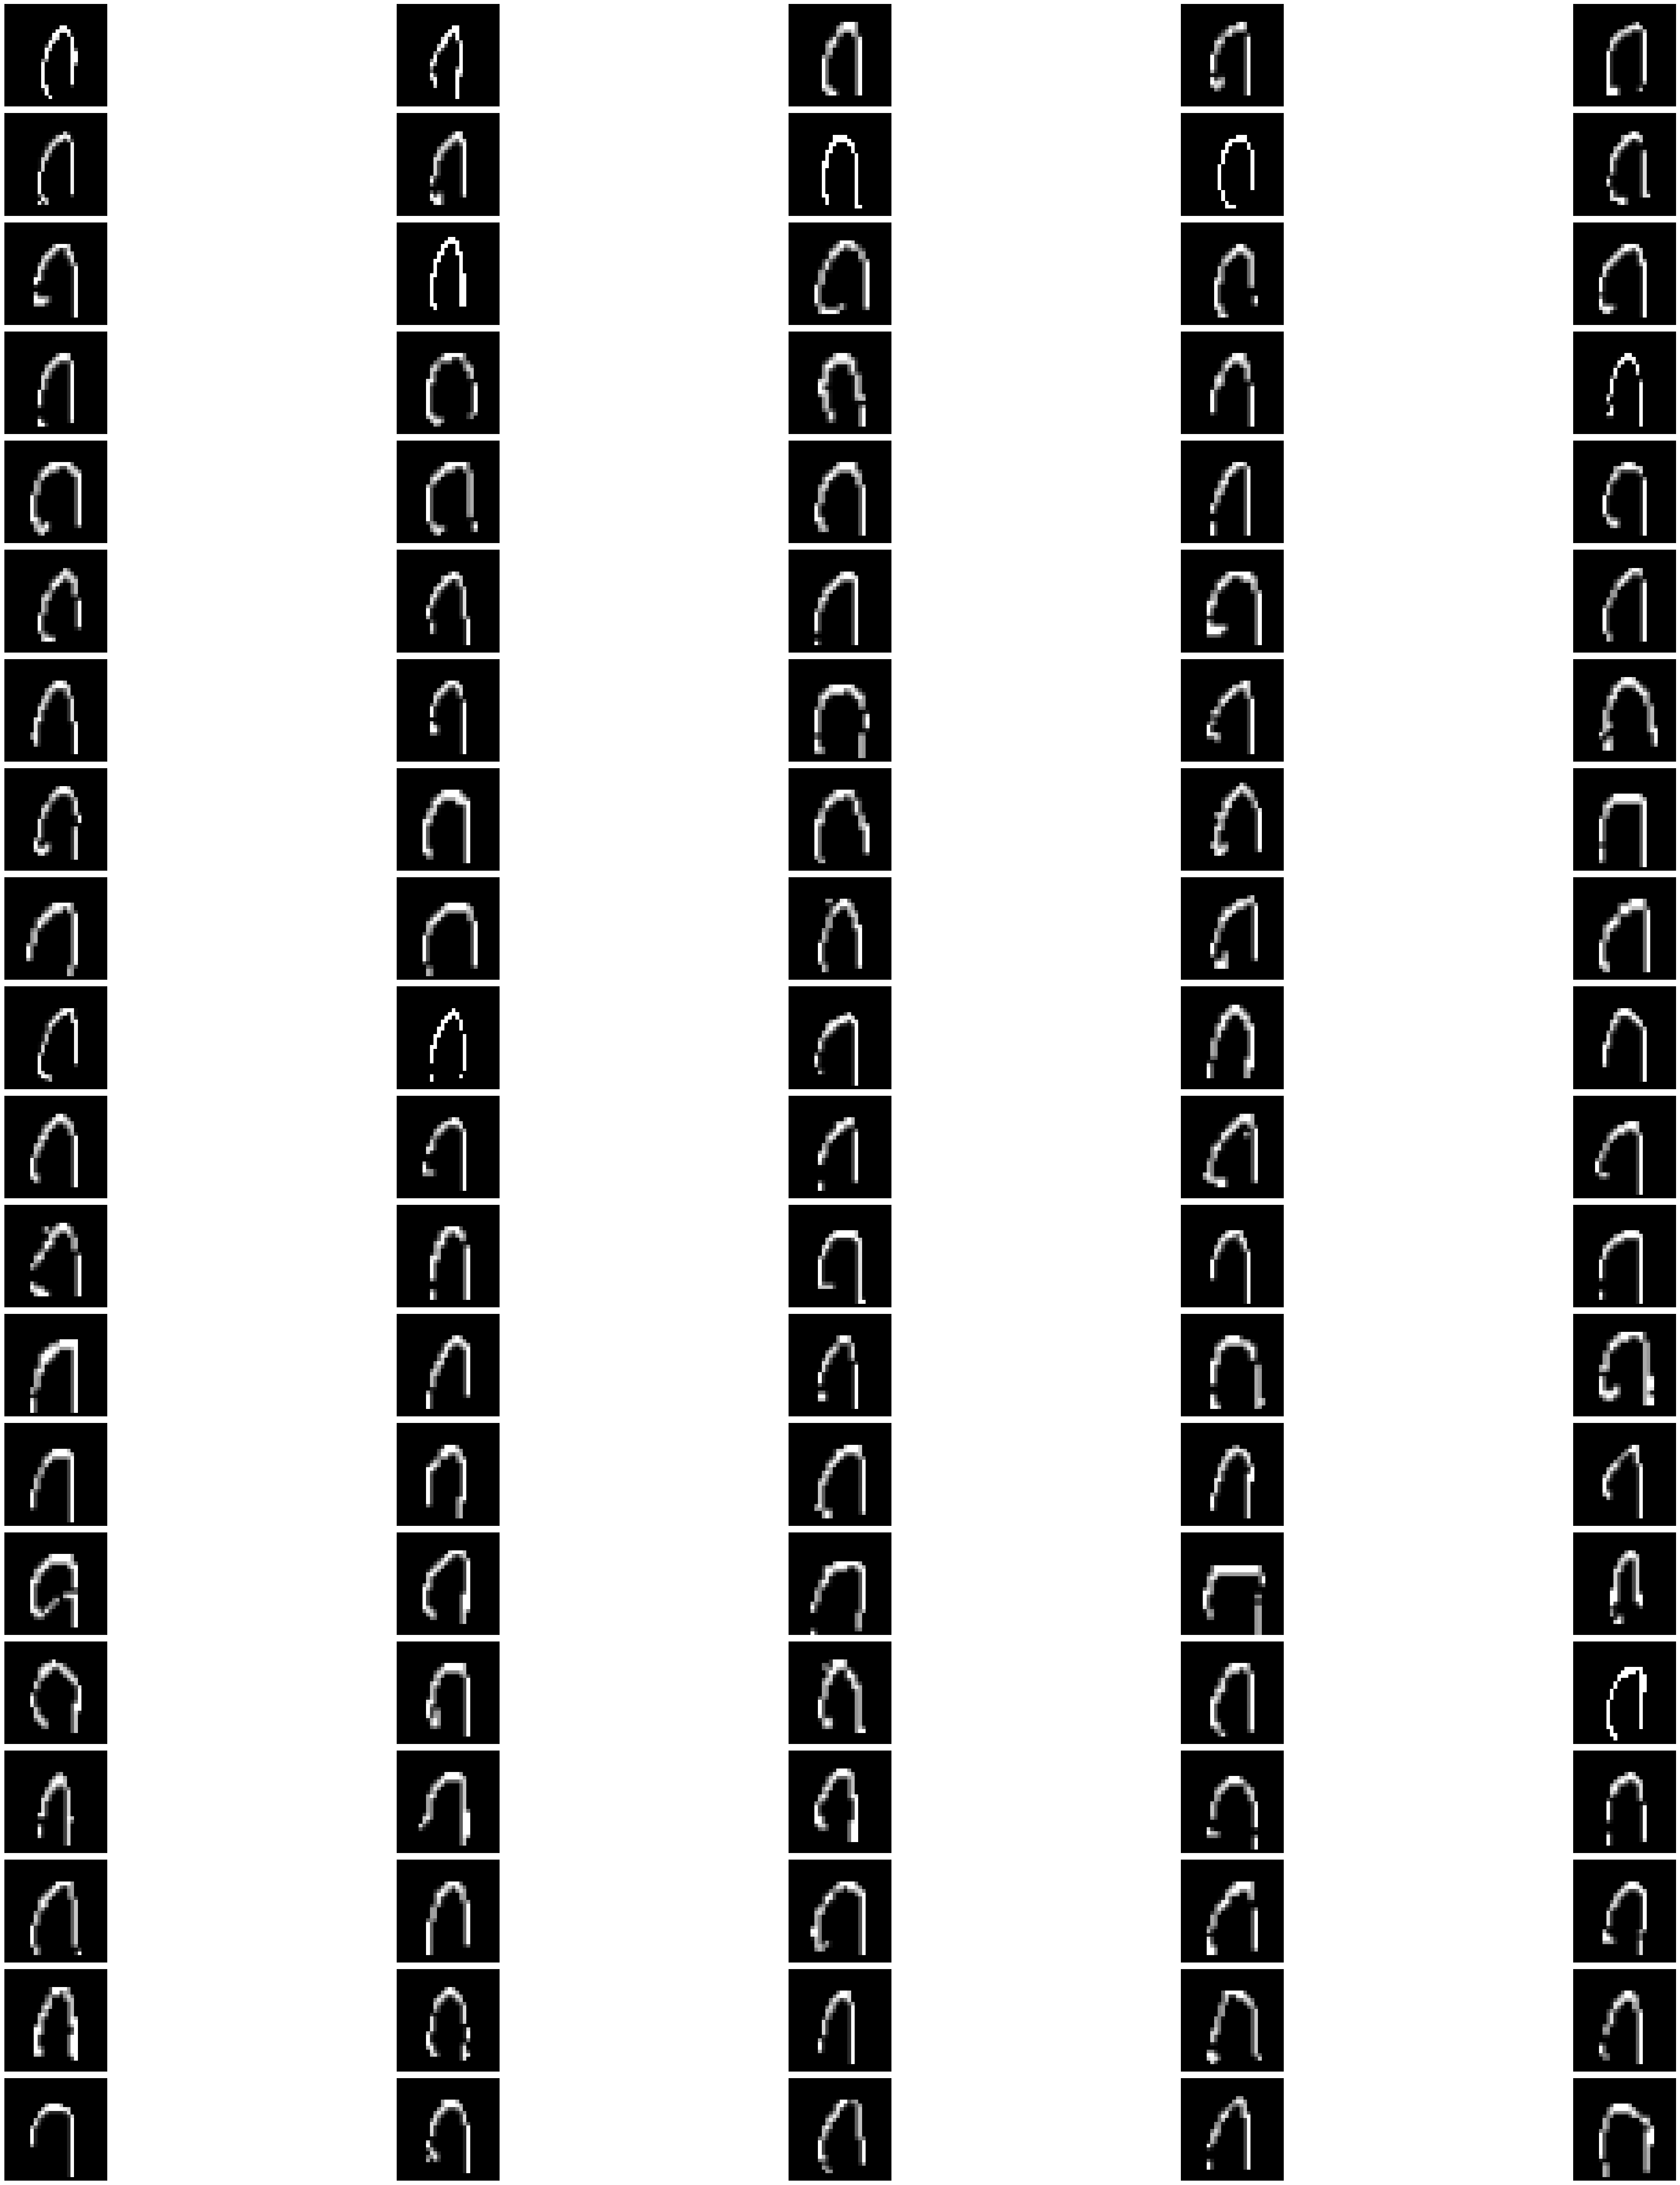

In [123]:
ones = []

for i in range(len(Y_train)):
    if Y_train[i] == 1:
        ones.append(i)

plt.figure(figsize=(50, 50))

for i in range(100):
    plt.subplot(20, 5, i + 1)
    plt.imshow(x_train[ones[i]], cmap='gray')
    #plt.title(f"{dig_pred[0][get_[i]][7]}, {dig_pred[0][get_[i]][3]}, {get_[i]}", fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()

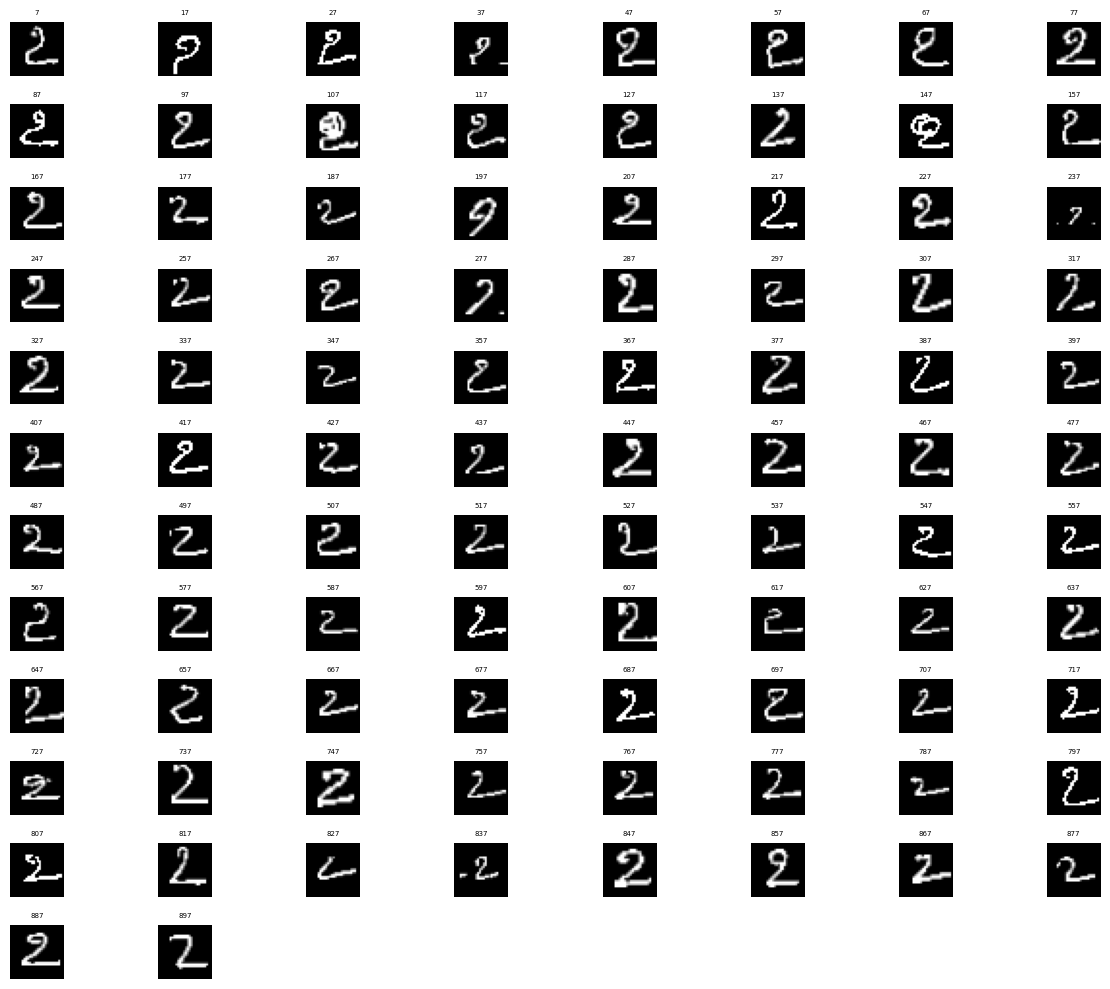

In [64]:
get_sevens = []

for i in range(len(dig_y)):
  if dig_y[i] == 7:
    get_sevens.append(i)


plt.figure(figsize=(12, 10))

for i in range(90):
    plt.subplot(12, 8, i + 1)
    plt.imshow(dig_x[get_sevens[i]], cmap='gray')
    plt.title(get_sevens[i], fontsize=5)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [75]:
three = []
seven = []

for i in range(len(Y_train)):
  if Y_train[i] == 3:
    three.append(i)
  if Y_train[i] == 7:
    seven.append(i)

In [78]:
x_train = X_train/255

In [79]:
x_train = x_train.values.reshape(-1, 28, 28)

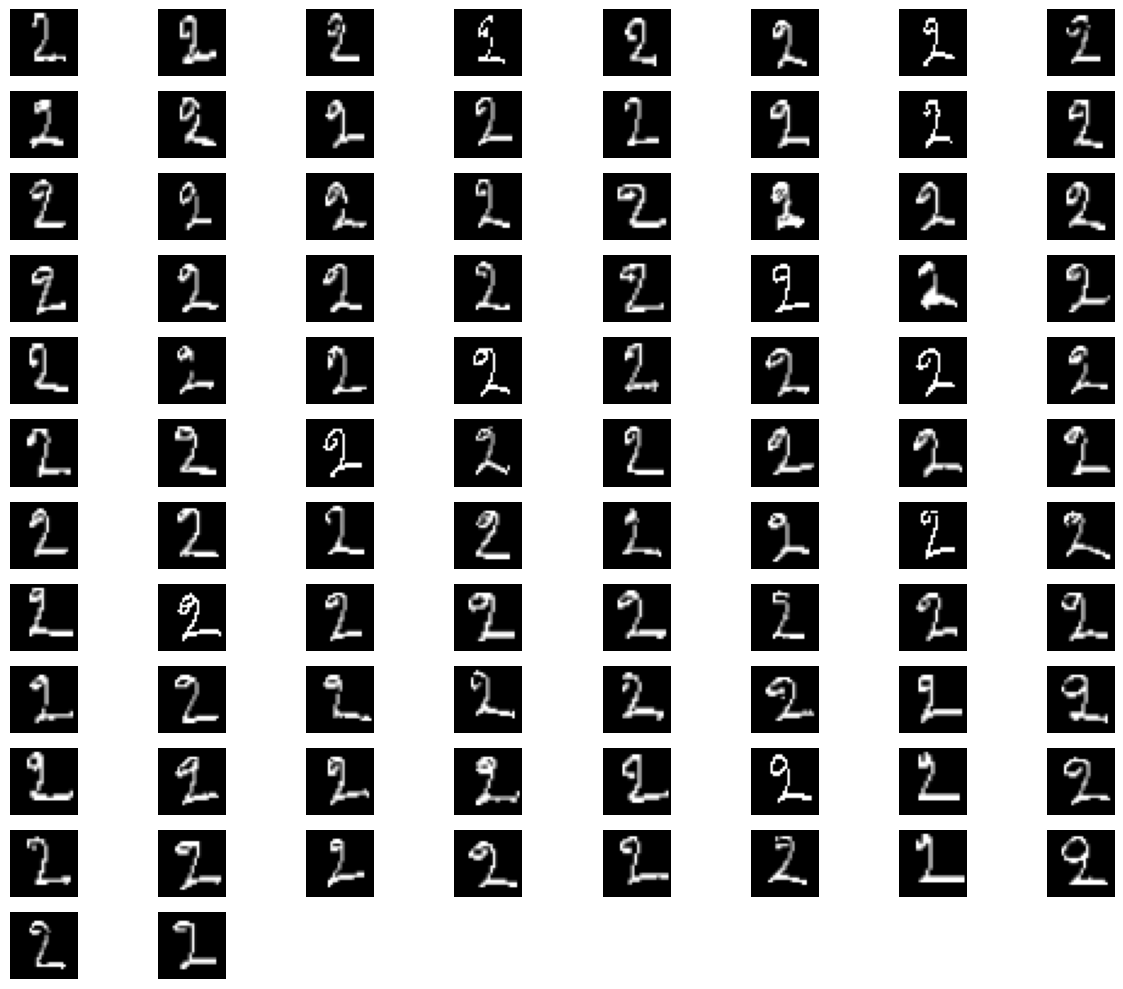

In [80]:
plt.figure(figsize=(12, 10))

for i in range(90):
    plt.subplot(12, 8, i + 1)
    plt.imshow(x_train[seven[i]], cmap='gray')
    #plt.title(get_sevens[i], fontsize=5)
    plt.axis('off')

plt.tight_layout()
plt.show()

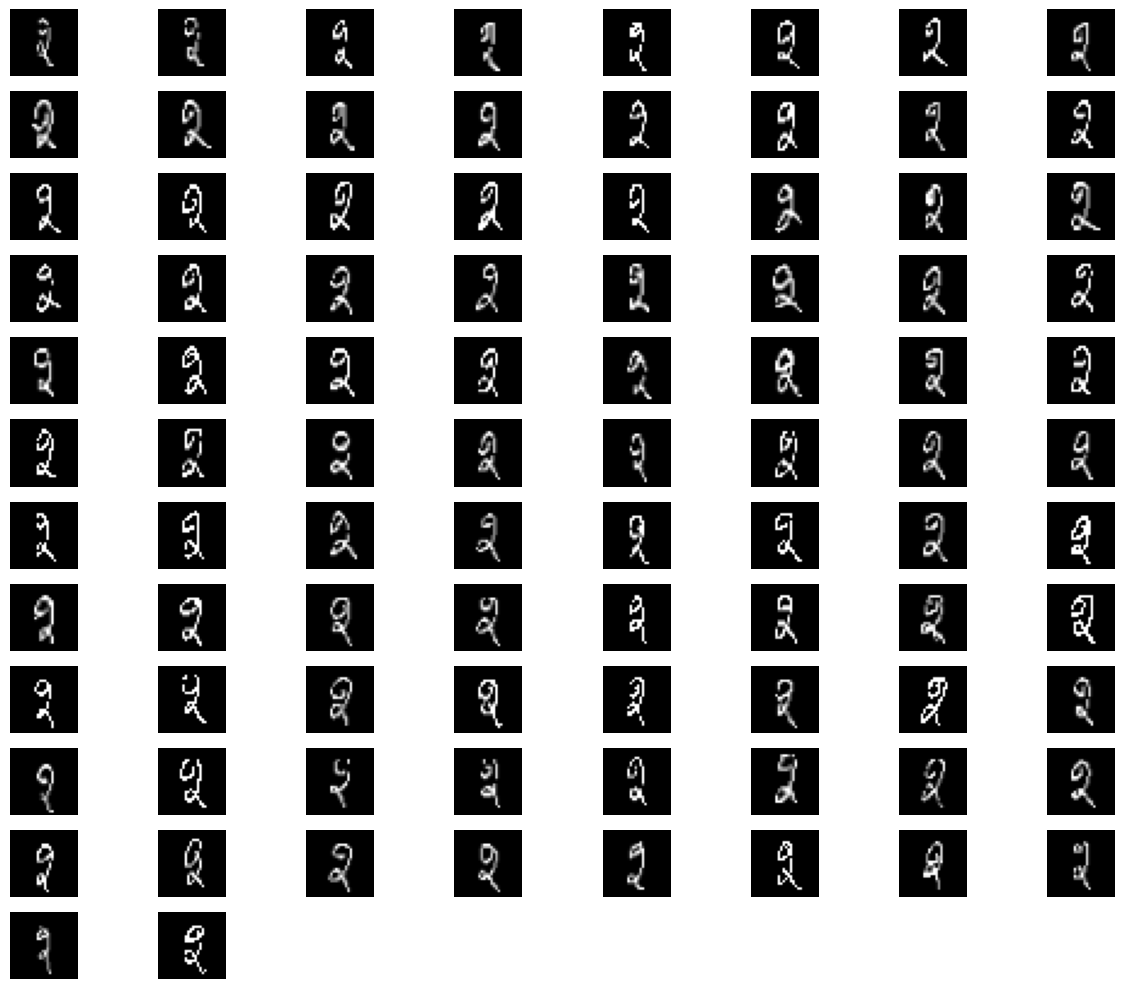

In [81]:
plt.figure(figsize=(12, 10))

for i in range(90):
    plt.subplot(12, 8, i + 1)
    plt.imshow(x_train[three[i]], cmap='gray')
    #plt.title(get_sevens[i], fontsize=5)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [173]:
train = pd.read_csv('/content/drive/MyDrive/Kannada-MNIST/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Kannada-MNIST/test.csv')
test = test.drop('id',axis=1)

X_train = train.drop('label',axis=1)
Y_train = train.label
X_train = X_train/255
test = test/255

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

Y_train = to_categorical(Y_train)
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,random_state=42,test_size=0.15)

In [174]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Output nodes for 10 classes

optimizer=Adam(learning_rate = 0.001,beta_1 = 0.9,beta_2 = 0.999)
model.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])

model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 conv2d_76 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 batch_normalization_27 (Ba  (None, 24, 24, 128)       512       
 tchNormalization)                                               
                                                                 
 dropout_26 (Dropout)        (None, 24, 24, 128)       0         
                                                                 
 conv2d_77 (Conv2D)          (None, 22, 22, 128)       147584    
                                                                 
 conv2d_78 (Conv2D)          (None, 20, 20, 128)       147584    
                                                     

In [176]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [198]:
epochs =100 #change this to 30 if you need to get better score
batch_size = 64

In [199]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/100


796/796 - 24s - loss: 0.0347 - accuracy: 0.9905 - val_loss: 0.0231 - val_accuracy: 0.9926 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 2/100


796/796 - 26s - loss: 0.0336 - accuracy: 0.9905 - val_loss: 0.0211 - val_accuracy: 0.9949 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 3/100


796/796 - 24s - loss: 0.0337 - accuracy: 0.9909 - val_loss: 0.0152 - val_accuracy: 0.9957 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 4/100


796/796 - 25s - loss: 0.0310 - accuracy: 0.9919 - val_loss: 0.0179 - val_accuracy: 0.9959 - lr: 0.0010 - 25s/epoch - 31ms/step
Epoch 5/100


796/796 - 26s - loss: 0.0305 - accuracy: 0.9917 - val_loss: 0.0164 - val_accuracy: 0.9957 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 6/100


796/796 - 24s - loss: 0.0277 - accuracy: 0.9921 - val_loss: 0.0155 - val_accuracy: 0.9957 - lr: 0.0010 - 24s/epoch - 31ms/step
Epoch 7/100


796/796 - 24s - loss: 0.0309 - accuracy: 0.9918 - val_loss: 0.0176 - val_accuracy: 0.9949 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 8/100


796/796 - 26s - loss: 0.0260 - accuracy: 0.9928 - val_loss: 0.0181 - val_accuracy: 0.9958 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 9/100


796/796 - 24s - loss: 0.0271 - accuracy: 0.9924 - val_loss: 0.0133 - val_accuracy: 0.9964 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 10/100


796/796 - 26s - loss: 0.0227 - accuracy: 0.9941 - val_loss: 0.0269 - val_accuracy: 0.9920 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 11/100


796/796 - 27s - loss: 0.0249 - accuracy: 0.9933 - val_loss: 0.0187 - val_accuracy: 0.9957 - lr: 0.0010 - 27s/epoch - 33ms/step
Epoch 12/100


796/796 - 24s - loss: 0.0228 - accuracy: 0.9937 - val_loss: 0.0137 - val_accuracy: 0.9959 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 13/100


796/796 - 24s - loss: 0.0253 - accuracy: 0.9930 - val_loss: 0.0164 - val_accuracy: 0.9960 - lr: 0.0010 - 24s/epoch - 31ms/step
Epoch 14/100


796/796 - 26s - loss: 0.0229 - accuracy: 0.9936 - val_loss: 0.0137 - val_accuracy: 0.9967 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 15/100


796/796 - 27s - loss: 0.0219 - accuracy: 0.9941 - val_loss: 0.0098 - val_accuracy: 0.9969 - lr: 0.0010 - 27s/epoch - 33ms/step
Epoch 16/100


796/796 - 24s - loss: 0.0220 - accuracy: 0.9936 - val_loss: 0.0169 - val_accuracy: 0.9961 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 17/100


796/796 - 26s - loss: 0.0231 - accuracy: 0.9939 - val_loss: 0.0168 - val_accuracy: 0.9959 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 18/100


796/796 - 26s - loss: 0.0220 - accuracy: 0.9944 - val_loss: 0.0186 - val_accuracy: 0.9950 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 19/100


796/796 - 24s - loss: 0.0205 - accuracy: 0.9941 - val_loss: 0.0128 - val_accuracy: 0.9959 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 20/100


796/796 - 26s - loss: 0.0231 - accuracy: 0.9947 - val_loss: 0.0142 - val_accuracy: 0.9967 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 21/100


796/796 - 24s - loss: 0.0223 - accuracy: 0.9940 - val_loss: 0.0253 - val_accuracy: 0.9943 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 22/100


796/796 - 26s - loss: 0.0184 - accuracy: 0.9947 - val_loss: 0.0116 - val_accuracy: 0.9971 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 23/100


796/796 - 25s - loss: 0.0199 - accuracy: 0.9946 - val_loss: 0.0145 - val_accuracy: 0.9963 - lr: 0.0010 - 25s/epoch - 32ms/step
Epoch 24/100


796/796 - 24s - loss: 0.0197 - accuracy: 0.9948 - val_loss: 0.0147 - val_accuracy: 0.9968 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 25/100


796/796 - 26s - loss: 0.0196 - accuracy: 0.9943 - val_loss: 0.0152 - val_accuracy: 0.9964 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 26/100


796/796 - 24s - loss: 0.0205 - accuracy: 0.9947 - val_loss: 0.0112 - val_accuracy: 0.9966 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 27/100


796/796 - 25s - loss: 0.0167 - accuracy: 0.9956 - val_loss: 0.0213 - val_accuracy: 0.9970 - lr: 0.0010 - 25s/epoch - 32ms/step
Epoch 28/100


796/796 - 25s - loss: 0.0217 - accuracy: 0.9951 - val_loss: 0.0263 - val_accuracy: 0.9954 - lr: 0.0010 - 25s/epoch - 31ms/step
Epoch 29/100


796/796 - 24s - loss: 0.0182 - accuracy: 0.9952 - val_loss: 0.0144 - val_accuracy: 0.9966 - lr: 0.0010 - 24s/epoch - 31ms/step
Epoch 30/100


796/796 - 26s - loss: 0.0167 - accuracy: 0.9956 - val_loss: 0.0179 - val_accuracy: 0.9960 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 31/100


796/796 - 24s - loss: 0.0153 - accuracy: 0.9957 - val_loss: 0.0203 - val_accuracy: 0.9964 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 32/100


796/796 - 24s - loss: 0.0205 - accuracy: 0.9947 - val_loss: 0.0203 - val_accuracy: 0.9966 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 33/100


796/796 - 26s - loss: 0.0157 - accuracy: 0.9956 - val_loss: 0.0175 - val_accuracy: 0.9967 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 34/100


796/796 - 24s - loss: 0.0179 - accuracy: 0.9953 - val_loss: 0.0130 - val_accuracy: 0.9964 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 35/100


796/796 - 26s - loss: 0.0158 - accuracy: 0.9955 - val_loss: 0.0187 - val_accuracy: 0.9959 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 36/100


796/796 - 24s - loss: 0.0161 - accuracy: 0.9955 - val_loss: 0.0127 - val_accuracy: 0.9967 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 37/100


796/796 - 24s - loss: 0.0164 - accuracy: 0.9956 - val_loss: 0.0141 - val_accuracy: 0.9966 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 38/100


796/796 - 24s - loss: 0.0165 - accuracy: 0.9958 - val_loss: 0.0193 - val_accuracy: 0.9956 - lr: 0.0010 - 24s/epoch - 31ms/step
Epoch 39/100


796/796 - 25s - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.0108 - val_accuracy: 0.9963 - lr: 0.0010 - 25s/epoch - 32ms/step
Epoch 40/100


796/796 - 26s - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.0149 - val_accuracy: 0.9963 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 41/100


796/796 - 24s - loss: 0.0170 - accuracy: 0.9954 - val_loss: 0.0162 - val_accuracy: 0.9970 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 42/100


796/796 - 25s - loss: 0.0160 - accuracy: 0.9959 - val_loss: 0.0213 - val_accuracy: 0.9966 - lr: 0.0010 - 25s/epoch - 31ms/step
Epoch 43/100


796/796 - 26s - loss: 0.0154 - accuracy: 0.9955 - val_loss: 0.0154 - val_accuracy: 0.9964 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 44/100


796/796 - 24s - loss: 0.0137 - accuracy: 0.9962 - val_loss: 0.0141 - val_accuracy: 0.9967 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 45/100


796/796 - 26s - loss: 0.0171 - accuracy: 0.9955 - val_loss: 0.0177 - val_accuracy: 0.9961 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 46/100


796/796 - 25s - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.0153 - val_accuracy: 0.9968 - lr: 0.0010 - 25s/epoch - 31ms/step
Epoch 47/100


796/796 - 24s - loss: 0.0144 - accuracy: 0.9964 - val_loss: 0.0161 - val_accuracy: 0.9970 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 48/100


796/796 - 26s - loss: 0.0146 - accuracy: 0.9963 - val_loss: 0.0190 - val_accuracy: 0.9967 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 49/100


796/796 - 24s - loss: 0.0160 - accuracy: 0.9958 - val_loss: 0.0116 - val_accuracy: 0.9967 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 50/100


796/796 - 27s - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.0133 - val_accuracy: 0.9973 - lr: 0.0010 - 27s/epoch - 34ms/step
Epoch 51/100


796/796 - 26s - loss: 0.0155 - accuracy: 0.9961 - val_loss: 0.0129 - val_accuracy: 0.9967 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 52/100


796/796 - 24s - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.0131 - val_accuracy: 0.9973 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 53/100


796/796 - 24s - loss: 0.0155 - accuracy: 0.9960 - val_loss: 0.0123 - val_accuracy: 0.9969 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 54/100


796/796 - 26s - loss: 0.0138 - accuracy: 0.9963 - val_loss: 0.0140 - val_accuracy: 0.9974 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 55/100


796/796 - 24s - loss: 0.0134 - accuracy: 0.9965 - val_loss: 0.0135 - val_accuracy: 0.9969 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 56/100


796/796 - 26s - loss: 0.0118 - accuracy: 0.9966 - val_loss: 0.0138 - val_accuracy: 0.9963 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 57/100


796/796 - 25s - loss: 0.0143 - accuracy: 0.9965 - val_loss: 0.0126 - val_accuracy: 0.9969 - lr: 0.0010 - 25s/epoch - 31ms/step
Epoch 58/100


796/796 - 24s - loss: 0.0137 - accuracy: 0.9964 - val_loss: 0.0154 - val_accuracy: 0.9968 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 59/100


796/796 - 26s - loss: 0.0153 - accuracy: 0.9962 - val_loss: 0.0157 - val_accuracy: 0.9969 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 60/100


796/796 - 26s - loss: 0.0135 - accuracy: 0.9962 - val_loss: 0.0105 - val_accuracy: 0.9970 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 61/100


796/796 - 24s - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.0101 - val_accuracy: 0.9976 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 62/100


796/796 - 26s - loss: 0.0128 - accuracy: 0.9964 - val_loss: 0.0120 - val_accuracy: 0.9966 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 63/100


796/796 - 26s - loss: 0.0153 - accuracy: 0.9962 - val_loss: 0.0153 - val_accuracy: 0.9969 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 64/100


796/796 - 24s - loss: 0.0143 - accuracy: 0.9964 - val_loss: 0.0166 - val_accuracy: 0.9963 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 65/100


796/796 - 26s - loss: 0.0121 - accuracy: 0.9968 - val_loss: 0.0202 - val_accuracy: 0.9959 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 66/100


796/796 - 26s - loss: 0.0128 - accuracy: 0.9969 - val_loss: 0.0164 - val_accuracy: 0.9976 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 67/100


796/796 - 24s - loss: 0.0126 - accuracy: 0.9971 - val_loss: 0.0178 - val_accuracy: 0.9968 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 68/100


796/796 - 26s - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.0231 - val_accuracy: 0.9957 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 69/100


796/796 - 25s - loss: 0.0140 - accuracy: 0.9963 - val_loss: 0.0168 - val_accuracy: 0.9967 - lr: 0.0010 - 25s/epoch - 32ms/step
Epoch 70/100


796/796 - 25s - loss: 0.0116 - accuracy: 0.9967 - val_loss: 0.0110 - val_accuracy: 0.9970 - lr: 0.0010 - 25s/epoch - 31ms/step
Epoch 71/100


796/796 - 26s - loss: 0.0138 - accuracy: 0.9965 - val_loss: 0.0132 - val_accuracy: 0.9970 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 72/100


796/796 - 24s - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.0115 - val_accuracy: 0.9973 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 73/100


796/796 - 25s - loss: 0.0117 - accuracy: 0.9968 - val_loss: 0.0181 - val_accuracy: 0.9968 - lr: 0.0010 - 25s/epoch - 32ms/step
Epoch 74/100


796/796 - 26s - loss: 0.0122 - accuracy: 0.9967 - val_loss: 0.0228 - val_accuracy: 0.9969 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 75/100


796/796 - 25s - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.0190 - val_accuracy: 0.9972 - lr: 0.0010 - 25s/epoch - 31ms/step
Epoch 76/100


796/796 - 25s - loss: 0.0133 - accuracy: 0.9968 - val_loss: 0.0177 - val_accuracy: 0.9962 - lr: 0.0010 - 25s/epoch - 31ms/step
Epoch 77/100


796/796 - 26s - loss: 0.0119 - accuracy: 0.9966 - val_loss: 0.0161 - val_accuracy: 0.9972 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 78/100


796/796 - 27s - loss: 0.0118 - accuracy: 0.9970 - val_loss: 0.0181 - val_accuracy: 0.9967 - lr: 0.0010 - 27s/epoch - 34ms/step
Epoch 79/100


796/796 - 24s - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0195 - val_accuracy: 0.9967 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 80/100


796/796 - 27s - loss: 0.0120 - accuracy: 0.9971 - val_loss: 0.0140 - val_accuracy: 0.9968 - lr: 0.0010 - 27s/epoch - 33ms/step
Epoch 81/100


796/796 - 26s - loss: 0.0100 - accuracy: 0.9974 - val_loss: 0.0158 - val_accuracy: 0.9969 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 82/100


796/796 - 24s - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.0122 - val_accuracy: 0.9972 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 83/100


796/796 - 26s - loss: 0.0118 - accuracy: 0.9968 - val_loss: 0.0138 - val_accuracy: 0.9969 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 84/100


796/796 - 24s - loss: 0.0105 - accuracy: 0.9974 - val_loss: 0.0116 - val_accuracy: 0.9977 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 85/100


796/796 - 26s - loss: 0.0124 - accuracy: 0.9971 - val_loss: 0.0127 - val_accuracy: 0.9969 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 86/100


796/796 - 26s - loss: 0.0104 - accuracy: 0.9971 - val_loss: 0.0121 - val_accuracy: 0.9974 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 87/100


796/796 - 24s - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.0169 - val_accuracy: 0.9961 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 88/100


796/796 - 25s - loss: 0.0125 - accuracy: 0.9971 - val_loss: 0.0112 - val_accuracy: 0.9971 - lr: 0.0010 - 25s/epoch - 31ms/step
Epoch 89/100


796/796 - 26s - loss: 0.0136 - accuracy: 0.9967 - val_loss: 0.0179 - val_accuracy: 0.9971 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 90/100


796/796 - 26s - loss: 0.0128 - accuracy: 0.9967 - val_loss: 0.0173 - val_accuracy: 0.9967 - lr: 0.0010 - 26s/epoch - 32ms/step
Epoch 91/100


796/796 - 24s - loss: 0.0112 - accuracy: 0.9972 - val_loss: 0.0123 - val_accuracy: 0.9968 - lr: 0.0010 - 24s/epoch - 30ms/step
Epoch 92/100


796/796 - 25s - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.0112 - val_accuracy: 0.9978 - lr: 0.0010 - 25s/epoch - 31ms/step
Epoch 93/100


796/796 - 26s - loss: 0.0108 - accuracy: 0.9974 - val_loss: 0.0134 - val_accuracy: 0.9971 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 94/100


796/796 - 25s - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.0119 - val_accuracy: 0.9974 - lr: 0.0010 - 25s/epoch - 31ms/step
Epoch 95/100


796/796 - 25s - loss: 0.0099 - accuracy: 0.9974 - val_loss: 0.0144 - val_accuracy: 0.9971 - lr: 0.0010 - 25s/epoch - 31ms/step
Epoch 96/100


796/796 - 26s - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.0200 - val_accuracy: 0.9963 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 97/100


796/796 - 25s - loss: 0.0130 - accuracy: 0.9967 - val_loss: 0.0140 - val_accuracy: 0.9974 - lr: 0.0010 - 25s/epoch - 32ms/step
Epoch 98/100


796/796 - 25s - loss: 0.0100 - accuracy: 0.9977 - val_loss: 0.0188 - val_accuracy: 0.9966 - lr: 0.0010 - 25s/epoch - 31ms/step
Epoch 99/100


796/796 - 23s - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0179 - val_accuracy: 0.9963 - lr: 0.0010 - 23s/epoch - 29ms/step
Epoch 100/100


796/796 - 25s - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0123 - val_accuracy: 0.9969 - lr: 0.0010 - 25s/epoch - 31ms/step


In [209]:
xx = np.load('/content/drive/MyDrive/Kannada-MNIST/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test/arr_0.npy')
yy = np.load('/content/drive/MyDrive/Kannada-MNIST/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test/arr_0.npy')

xx = xx/255

313/313 [==============================] - 1s 4ms/step


In [214]:
model.save("CNN_MoreFilters.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


YES, ensembling the resnet100pe and the CNN model that has 128 filters.

In [229]:
pp_moreFilters = model.predict(dig_x)

320/320 [==============================] - 2s 7ms/step


In [219]:
cc = pd.DataFrame(confusion_matrix(dig_y, pp), index = range(0, 10), columns = range(0, 10))

In [222]:
cc

,0,1,2,3,4,5,6,7,8,9
0,730,63,112,3,2,11,1,2,10,90
1,38,920,20,1,0,11,0,27,2,5
2,3,3,992,4,0,11,2,4,3,2
3,0,1,58,896,2,16,10,38,2,1
4,0,7,22,1,958,13,5,2,6,10
5,0,3,5,8,14,992,0,1,1,0
6,0,5,20,2,24,9,845,47,7,65
7,1,7,24,2,0,13,109,856,0,12
8,1,4,28,6,6,11,26,0,935,7
9,2,3,7,1,0,3,45,3,9,951


In [237]:
accuracy_score(np.argmax(pp_moreFilters, axis = 1), dig_y)

0.88623046875

In [230]:
pp_resnet = models[0].predict(dig_x)

320/320 [==============================] - 1s 3ms/step


In [231]:
ensemble_pred = np.argmax((pp_moreFilters + pp_resnet) / 2, axis=1)  # Take the average


In [233]:
pd.DataFrame(confusion_matrix(dig_y, ensemble_pred))

,0,1,2,3,4,5,6,7,8,9
0,790,52,63,1,1,10,1,2,16,88
1,29,944,16,1,0,8,0,19,2,5
2,3,5,995,3,0,9,2,2,2,3
3,2,4,41,911,0,18,3,44,1,0
4,1,7,16,2,965,11,6,3,5,8
5,0,2,4,4,12,1000,0,0,2,0
6,3,4,19,1,22,4,859,39,16,57
7,2,5,22,1,0,12,114,858,3,7
8,4,3,14,2,2,10,27,0,959,3
9,2,7,6,0,0,2,49,2,12,944


In [234]:
# best score as of now
accuracy_score(dig_y, ensemble_pred)

0.90087890625

In [211]:
c = confusion_matrix(yy, p)
c = pd.DataFrame(c, index=range(0,10), columns=range(0,10))

In [225]:
conf_resnet100ep

,0,1,2,3,4,5,6,7,8,9
0,954,46,0,0,0,0,0,0,0,0
1,2,997,0,0,0,0,0,0,0,1
2,3,0,997,0,0,0,0,0,0,0
3,2,16,0,967,4,3,0,7,0,1
4,0,1,0,2,995,0,1,0,0,1
5,0,0,0,3,33,964,0,0,0,0
6,0,1,0,0,0,0,951,3,0,45
7,4,5,4,6,2,0,6,967,1,5
8,0,0,0,0,1,1,0,0,998,0
9,1,0,0,0,0,0,0,0,0,999


Ensembling all the models

In [239]:
# add the new model with more filters to the dig_pred list

dig_pred.append(pp_moreFilters)
dig_preds.append(np.argmax(pp_moreFilters, axis = 1))

In [241]:
ensemble_sum = np.sum(dig_pred, axis=0)

In [242]:
ensemble_avg = ensemble_sum / len(dig_pred)

In [244]:
final_boss = np.argmax(ensemble_avg, axis = 1)

In [245]:
pd.DataFrame(confusion_matrix(dig_y, final_boss))

,0,1,2,3,4,5,6,7,8,9
0,841,42,21,7,0,15,1,2,8,87
1,48,923,12,4,1,7,0,22,1,6
2,7,3,987,7,2,13,2,1,0,2
3,4,1,29,923,3,18,1,45,0,0
4,1,3,12,4,969,13,5,2,5,10
5,0,0,3,2,12,1004,0,0,3,0
6,3,6,19,7,15,9,885,29,5,46
7,2,5,23,3,0,11,153,820,3,4
8,2,4,12,6,1,11,27,0,953,8
9,1,7,5,1,0,3,59,1,13,934


In [246]:
accuracy_score(dig_y, final_boss)

0.90224609375

Oh yeah, got an accuracy of 90.22 by ensembling all the 7 models

In [247]:
# now try without the 5th model (as it did poorly on the dig)

dig_pred_without_5th = dig_pred[:4] + dig_pred[5:]
ensemble_sum = np.sum(dig_pred_without_5th, axis=0)
ensemble_avg = ensemble_sum / len(dig_pred_without_5th)
hope = np.argmax(ensemble_avg, axis = 1)

In [248]:
pd.DataFrame(confusion_matrix(dig_y, hope))

,0,1,2,3,4,5,6,7,8,9
0,849,45,13,8,1,11,1,2,7,87
1,40,935,9,4,1,5,0,23,1,6
2,5,4,984,9,2,13,2,3,0,2
3,4,1,30,926,3,16,1,43,0,0
4,1,4,11,4,971,12,6,3,3,9
5,0,1,4,2,13,1000,0,0,4,0
6,3,6,17,7,15,7,884,32,4,49
7,3,5,19,3,0,10,142,835,3,4
8,3,5,10,6,2,9,28,0,955,6
9,1,10,3,1,0,1,57,1,14,936


In [1]:
accuracy_score(dig_y, hope)

NameError: ignored

fucking hell, got 90.57 accuracy. Don't use the 5th model, it was having less epochs of training anyway.

<module 'numpy' from '/usr/local/lib/python3.10/dist-packages/numpy/__init__.py'>

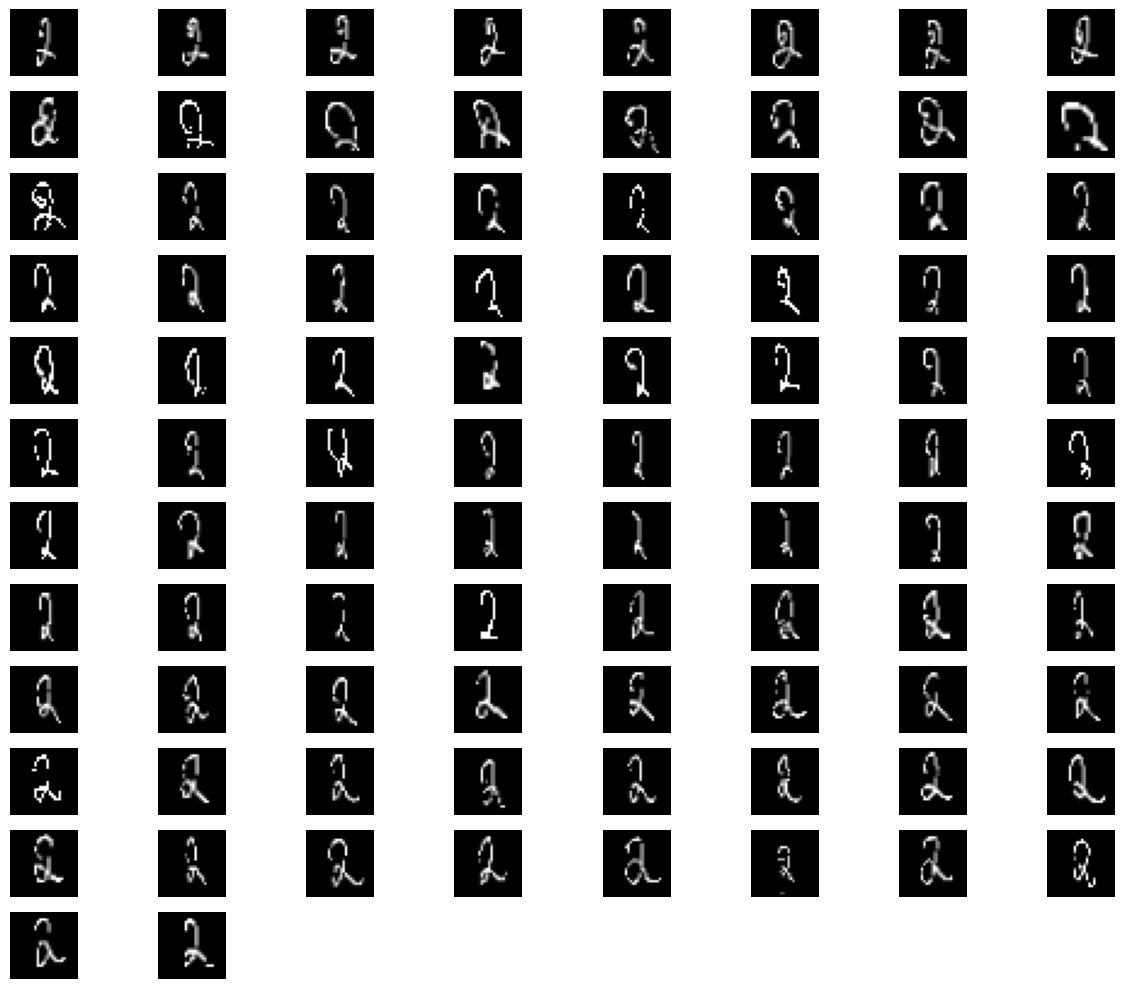

In [196]:
s = []

for i in range(len(yy)):
  if p[i] == 7 and yy[i] == 3:
    s.append(i)


plt.figure(figsize=(12, 10))

for i in range(90):
    plt.subplot(12, 8, i + 1)
    plt.imshow(xx[s[i]], cmap='gray')
    #plt.title(f"Actual: {actual_labels[i]}, Predicted: {predicted_labels[i]}", fontsize=4)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [149]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

X_train = X_train.values.reshape(-1,28,28,1)
datagen.fit(X_train)

In [150]:
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Add
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Add, Activation
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Add, Activation
from tensorflow.keras.models import Model

# Create a residual block function
def residual_block(layer, filters, kernel_size, strides=(1, 1)):
    # Store the input tensor for the skip connection
    input_tensor = layer

    x = Conv2D(filters=filters, kernel_size=kernel_size, padding='same', strides=strides, activation='relu')(layer)
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu')(x)
    x = BatchNormalization(momentum=0.15)(x)
    x = Dropout(0.25)(x)

    # Adjust the shape of the input tensor to match the shape of x for the addition
    if strides != (1, 1):
        input_tensor = Conv2D(filters=filters, kernel_size=(1, 1), padding='same', strides=strides)(input_tensor)

    # Perform the addition of the skip connection (input tensor) and x
    input_tensor = Conv2D(filters=filters, kernel_size=(1, 1), padding='same')(input_tensor)  # Match shapes
    x = Add()([x, input_tensor])
    x = Activation('relu')(x)  # Adding an activation function after the addition
    return x

# Your model with revised residual connections
input_layer = Input(shape=(28, 28, 1))
# Rest of your model architecture remains the same...

conv1 = Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu')(input_layer)
conv2 = Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu')(conv1)
batch_norm1 = BatchNormalization(momentum=0.15)(conv2)
pool1 = MaxPool2D(pool_size=(2, 2))(batch_norm1)
drop1 = Dropout(0.25)(pool1)

residual1 = residual_block(drop1, filters=64, kernel_size=(3, 3), strides=(2, 2))  # Adding strides to downsample
conv3 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(residual1)
conv4 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(conv3)
batch_norm2 = BatchNormalization(momentum=0.15)(conv4)
pool2 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(batch_norm2)
drop2 = Dropout(0.25)(pool2)

residual2 = residual_block(drop2, filters=32, kernel_size=(5, 5))

flatten = Flatten()(residual2)
dense1 = Dense(256, activation='relu')(flatten)
drop3 = Dropout(0.4)(dense1)
output = Dense(10, activation='softmax')(drop3)

model_with_residual = Model(inputs=input_layer, outputs=output)

In [153]:
optimizer=Adam(learning_rate = 0.001,beta_1 = 0.9,beta_2 = 0.999)

model_with_residual.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
epochs = 200#change this to 30 if you need to get better score
batch_size = 64


Y_train = to_categorical(Y_train)

h = model_with_residual.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                              epochs = epochs, verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                            ,callbacks=[learning_rate_reduction])

Epoch 1/200


2023-12-12 06:08:41.364589: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-12-12 06:08:42.908924: I external/local_xla/xla/service/service.cc:168] XLA service 0xa2e0bab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-12 06:08:42.908954: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-12-12 06:08:42.908962: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2023-12-12 06:08:42.908968: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (2): Tesla T4, Compute Capability 7.5
2023-12-12 06:08:42.908974: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (3): Tesla T4, Compute Capabi

937/937 - 21s - loss: 0.3086 - accuracy: 0.8995 - lr: 0.0010 - 21s/epoch - 23ms/step
Epoch 2/200
937/937 - 15s - loss: 0.0753 - accuracy: 0.9778 - lr: 0.0010 - 15s/epoch - 16ms/step
Epoch 3/200
937/937 - 15s - loss: 0.0589 - accuracy: 0.9828 - lr: 0.0010 - 15s/epoch - 16ms/step
Epoch 4/200
937/937 - 14s - loss: 0.0496 - accuracy: 0.9859 - lr: 0.0010 - 14s/epoch - 15ms/step
Epoch 5/200
937/937 - 14s - loss: 0.0425 - accuracy: 0.9880 - lr: 0.0010 - 14s/epoch - 15ms/step
Epoch 6/200
937/937 - 15s - loss: 0.0451 - accuracy: 0.9872 - lr: 0.0010 - 15s/epoch - 15ms/step
Epoch 7/200
937/937 - 15s - loss: 0.0386 - accuracy: 0.9890 - lr: 0.0010 - 15s/epoch - 16ms/step
Epoch 8/200
937/937 - 15s - loss: 0.0352 - accuracy: 0.9901 - lr: 0.0010 - 15s/epoch - 16ms/step
Epoch 9/200
937/937 - 14s - loss: 0.0308 - accuracy: 0.9915 - lr: 0.0010 - 14s/epoch - 15ms/step
Epoch 10/200
937/937 - 15s - loss: 0.0325 - accuracy: 0.9914 - lr: 0.0010 - 15s/epoch - 16ms/step
Epoch 11/200
937/937 - 14s - loss: 0.0297

In [159]:
model_with_residual.save('res_200ep.h5')

In [173]:
xx = np.load('Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test/arr_0.npy')
yy = np.load('Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test/arr_0.npy')

In [174]:

k = model_with_residual.predict(xx)

313/313 [==============================] - 1s 2ms/step


In [175]:
k = np.argmax(k, axis = 1)

In [176]:
accuracy_score(yy, k)

0.9818

In [181]:
kk = model_with_residual.predict(dig_x)

kk = np.argmax(kk, axis = 1)

accuracy_score(dig_y, kk)

320/320 [==============================] - 1s 2ms/step


0.88583984375

In [180]:
dig_x = dig_x * 255